In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 2. Tạo dataset giả lập
np.random.seed(42)
n_samples = 1000000
X_data = np.random.uniform(1, 10, (n_samples, 10))  # 10 đặc trưng ảnh hưởng đến điểm số

# Định nghĩa các cột đặc trưng
columns = [
    'Hours_Studied',       # Số giờ học
    'Sleep_Hours',         # Số giờ ngủ trung bình
    'Extracurriculars',    # Hoạt động ngoại khóa (số lượng)
    'Health_Index',        # Chỉ số sức khỏe (từ 1-10)
    'Parental_Involvement',# Sự hỗ trợ của phụ huynh (từ 1-10)
    'Tutoring_Hours',      # Số giờ học thêm
    'Internet_Usage',      # Số giờ sử dụng internet
    'Self_Study',          # Số giờ tự học
    'Attendance',          # Tỷ lệ đi học (%)
    'Motivation_Level'     # Mức độ động lực học tập (từ 1-10)
]

data = pd.DataFrame(X_data, columns=columns)

data['Grades'] = (
    5 * data['Hours_Studied'] +
    3 * data['Self_Study'] +
    2 * data['Parental_Involvement'] +
    1.5 * data['Tutoring_Hours'] -
    2 * data['Internet_Usage'] +
    np.random.normal(0, 5, n_samples)  # Công thức điểm + nhiễu
)

data.head()


,Hours_Studied,Sleep_Hours,Extracurriculars,Health_Index,Parental_Involvement,Tutoring_Hours,Internet_Usage,Self_Study,Attendance,Motivation_Level,Grades
0,4.370861,9.556429,7.587945,6.387926,2.404168,2.403951,1.522753,8.795585,6.410035,7.372653,52.680718
1,1.185260,9.729189,8.491984,2.911052,2.636425,2.650641,3.738180,5.722808,4.887505,3.621062,28.238799
2,6.506676,2.255445,3.629302,4.297257,5.104630,8.066584,2.797064,5.628110,6.331731,1.418054,67.915446
3,6.467904,2.534717,1.585464,9.539970,9.690688,8.275576,3.741524,1.879049,7.158097,4.961372,64.821061
4,2.098344,5.456592,1.309497,9.183884,3.329020,6.962701,3.805400,5.680612,5.920393,2.663690,35.421047


**Lưu dataset**

In [3]:
# Lưu dataset
data.to_csv('student_scores.csv', index=False)
print("Dataset đã được lưu thành student_scores.csv")

Dataset đã được lưu thành student_scores.csv


Thông tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Hours_Studied         1000000 non-null  float64
 1   Sleep_Hours           1000000 non-null  float64
 2   Extracurriculars      1000000 non-null  float64
 3   Health_Index          1000000 non-null  float64
 4   Parental_Involvement  1000000 non-null  float64
 5   Tutoring_Hours        1000000 non-null  float64
 6   Internet_Usage        1000000 non-null  float64
 7   Self_Study            1000000 non-null  float64
 8   Attendance            1000000 non-null  float64
 9   Motivation_Level      1000000 non-null  float64
 10  Grades                1000000 non-null  float64
dtypes: float64(11)
memory usage: 83.9 MB
None

Mô tả thống kê dataset:
        Hours_Studied     Sleep_Hours  Extracurriculars    Health_Index  \
count  1000000.000000  1000000.00

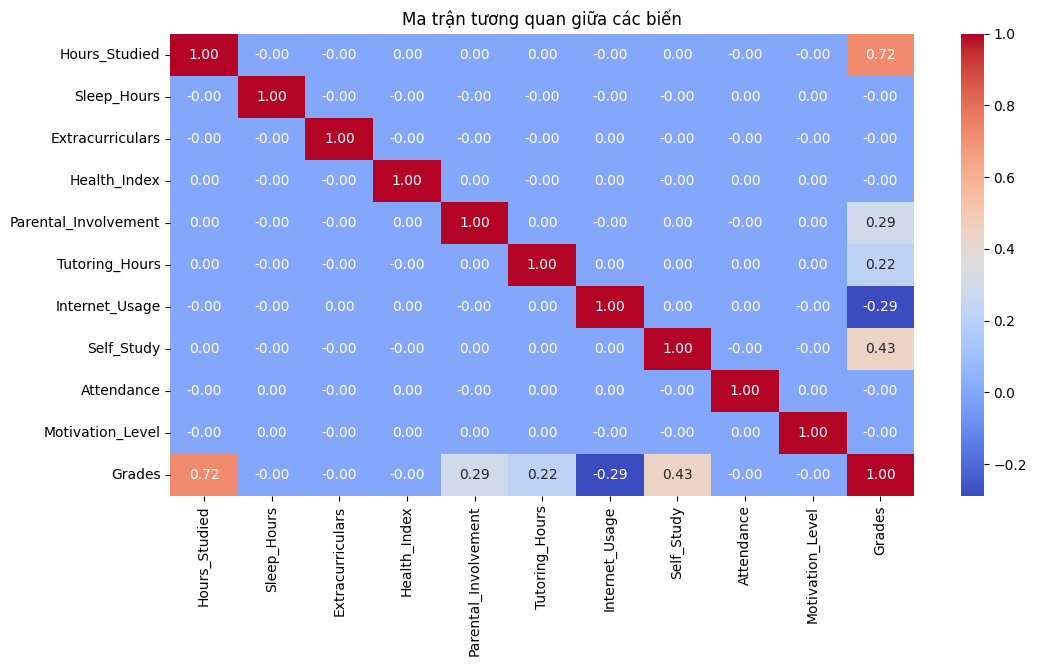

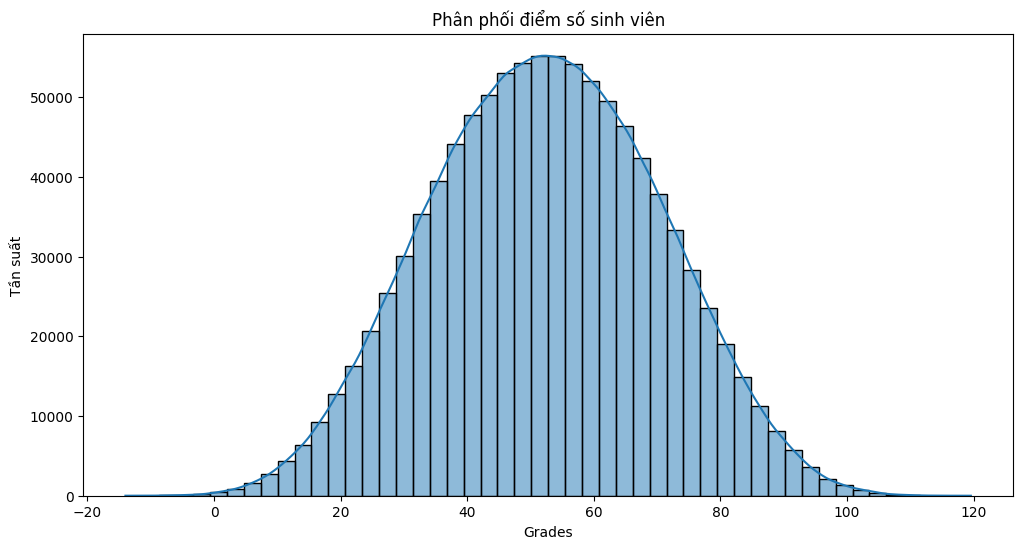

In [4]:
# 3. Tiền xử lí dữ liệu
# Hiển thị thông tin dataset
print("Thông tin dataset:")
print(data.info())
print("\nMô tả thống kê dataset:")
print(data.describe())
print("\nDữ liệu mẫu:")
print(data.head())

# Trực quan hóa dữ liệu
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Ma trận tương quan giữa các biến")
plt.show()

# Phân phối điểm số
plt.figure(figsize=(12, 6))
sns.histplot(data['Grades'], bins=50, kde=True)
plt.xlabel("Grades")
plt.ylabel("Tần suất")
plt.title("Phân phối điểm số sinh viên")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

data = pd.read_csv("student_scores.csv")  # Giả sử dữ liệu lưu trong file này
X = data.drop(columns=['Grades'])
y = data['Grades'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Định dạng lại dữ liệu để phù hợp với LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [6]:
# 2. Xây dựng mô hình LSTM
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 3. Huấn luyện mô hình với Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=3, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 530s 11ms/step - loss: 0.0060 - mae: 0.0563 - val_loss: 0.0017 - val_mae: 0.0330
Epoch 2/3
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 612s 12ms/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0019 - val_mae: 0.0345
Epoch 3/3
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 535s 11ms/step - loss: 0.0015 - mae: 0.0310 - val_loss: 0.0016 - val_mae: 0.0324


In [7]:
# 4. Lưu mô hình và scaler
model.save("student_score_lstm.h5")
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')
print("Mô hình đã được lưu thành student_score_lstm.h5")

Mô hình đã được lưu thành student_score_lstm.h5


In [8]:
# 6. Dự đoán
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step


In [9]:
# 7. Đánh giá mô hình
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")

MAE: 4.32, MSE: 29.28, RMSE: 5.41, R2 Score: 0.91


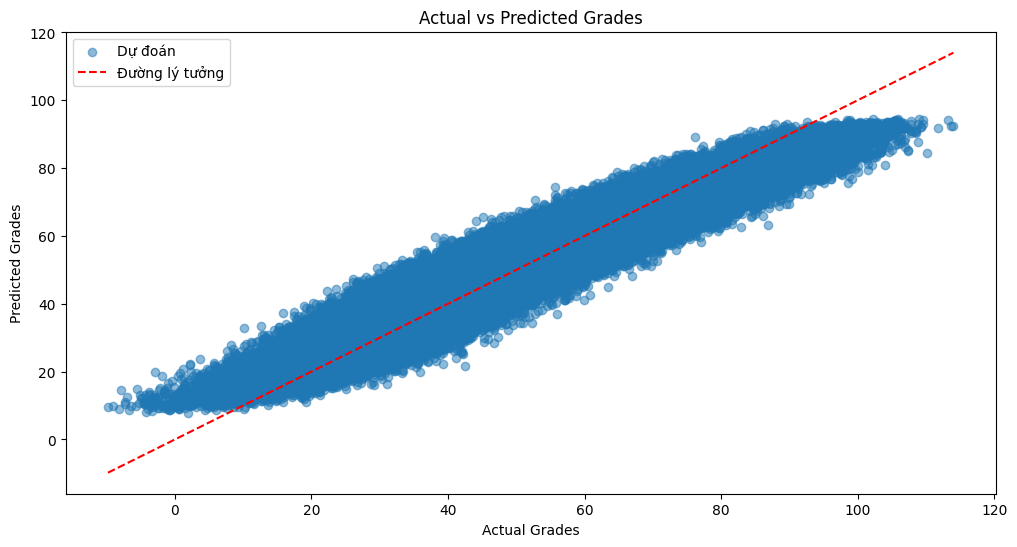

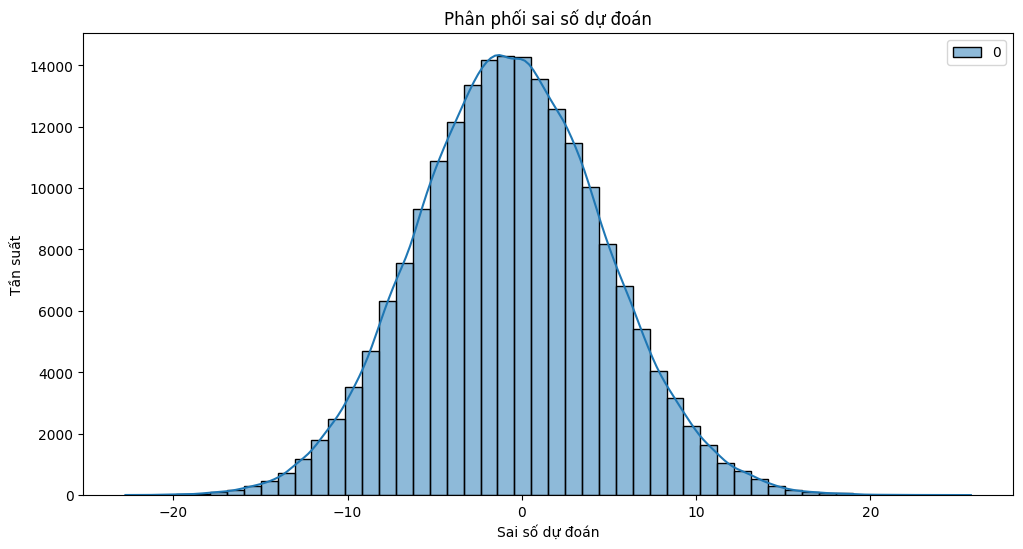

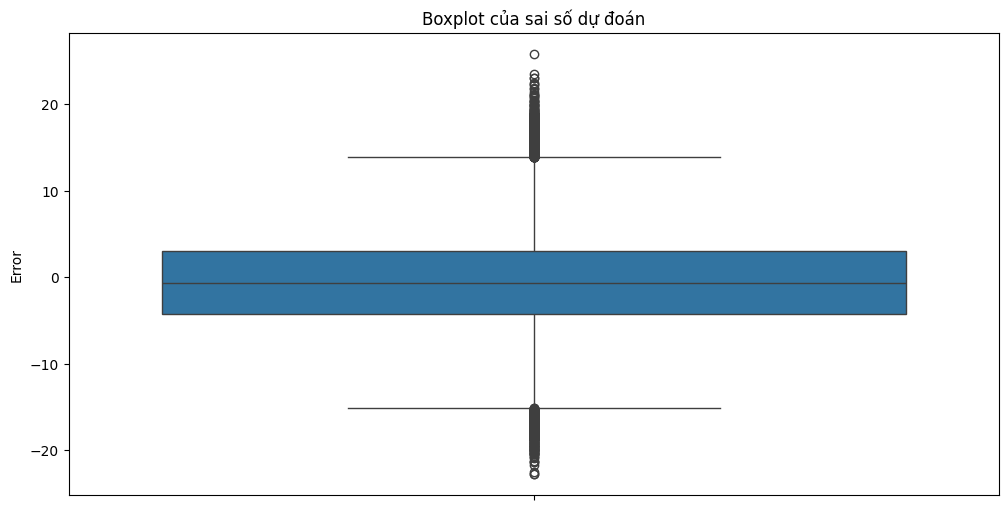

In [10]:
# 8. Trực quan hóa kết quả
plt.figure(figsize=(12, 6))
plt.scatter(y_test_inv, y_pred, alpha=0.5, label="Dự đoán")
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--', label="Đường lý tưởng")
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.legend()
plt.show()

# Biểu đồ phân phối sai số
errors = y_test_inv - y_pred
plt.figure(figsize=(12, 6))
sns.histplot(errors, bins=50, kde=True)
plt.xlabel("Sai số dự đoán")
plt.ylabel("Tần suất")
plt.title("Phân phối sai số dự đoán")
plt.show()

# Biểu đồ hộp cho thấy mức độ phân tán lỗi
data_error = pd.DataFrame({'Actual': y_test_inv.flatten(), 'Predicted': y_pred.flatten(), 'Error': errors.flatten()})
plt.figure(figsize=(12, 6))
sns.boxplot(y=data_error['Error'])
plt.title("Boxplot của sai số dự đoán")
plt.show()

In [13]:
from tensorflow.keras.models import Sequential, load_model
# 9. Tải lại mô hình và kiểm tra với toàn bộ dataset
loaded_model = load_model('student_score_lstm.h5', compile=False)
X_all_scaled = scaler_X.transform(X)
X_all_scaled = np.reshape(X_all_scaled, (X_all_scaled.shape[0], X_all_scaled.shape[1], 1))
all_predictions = loaded_model.predict(X_all_scaled)
all_predictions = scaler_y.inverse_transform(all_predictions)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 145s 5ms/step


In [14]:
# 10. In kết quả toàn bộ tập dữ liệu
results = pd.DataFrame({"Actual": y.flatten(), "Predicted": all_predictions.flatten()})
print(results.head(100))

       Actual  Predicted
0   52.680718  54.877666
1   28.238799  25.938822
2   67.915446  65.658478
3   64.821061  62.103809
4   35.421047  38.948509
..        ...        ...
95  48.811146  43.615208
96  21.817568  20.030504
97  25.627742  37.277363
98  43.621599  45.931347
99  36.701060  44.180367

[100 rows x 2 columns]
